In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#Preprocessing

In [8]:
df.shape

(178, 14)

In [13]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [14]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Text(0, 0.5, 'Value')

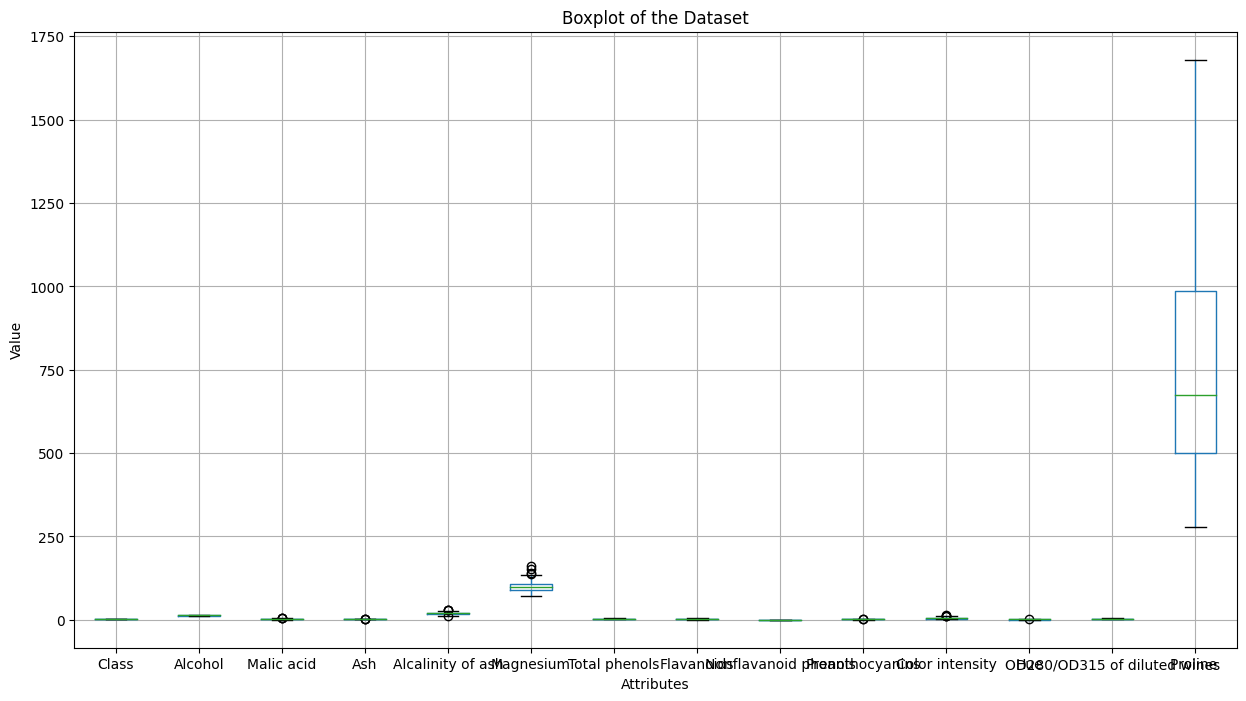

In [15]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('Boxplot of the Dataset')
plt.xlabel('Attributes')
plt.ylabel('Value')

In [ ]:
##shows negiligible amount of outliers

In [16]:
##next plot distributions of individual columns

Text(0.5, 0, 'Value of Alcohol Content')

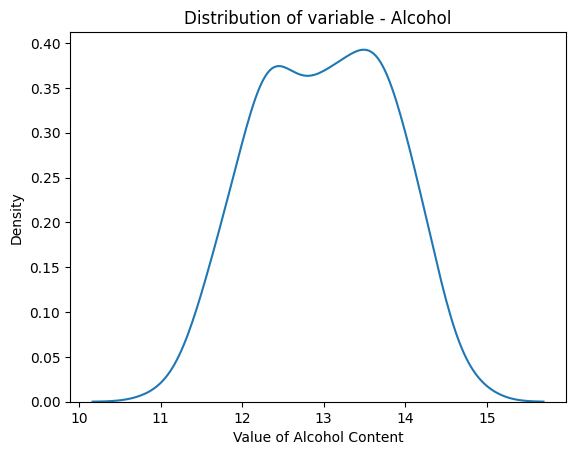

In [17]:
plt.figure()
sns.kdeplot(df['Alcohol'])
plt.title('Distribution of variable - Alcohol')
plt.xlabel('Value of Alcohol Content')

Text(0.5, 0, 'Value of Malic Acid Content')

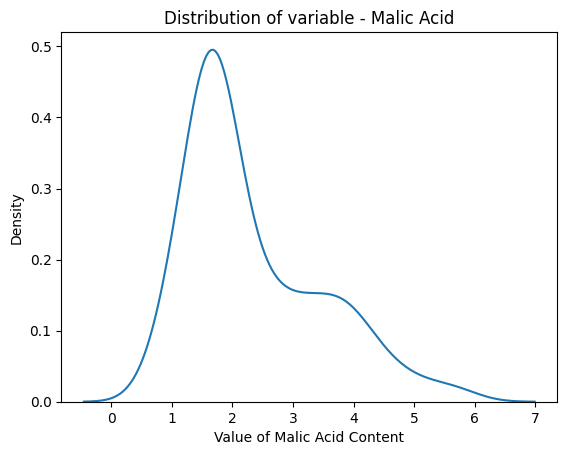

In [19]:
plt.figure()
sns.kdeplot(df['Malic acid'])
plt.title('Distribution of variable - Malic Acid')
plt.xlabel('Value of Malic Acid Content')

In [20]:
###Similarly do for all features

In [21]:
###Model Building

In [24]:
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=105)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=105)

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500,1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,4,5,6,7,8,9,10],
}

grid_search = GridSearchCV(model, params, cv=10)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=105),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

In [28]:
model = grid_search.best_estimator_
model.fit(x_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

